# **Problem Statement**

An **e-learning** B2C company is struggling to **identify and prioritize high-quality leads efficiently**. Currently, sales representatives are responsible for manually qualifying and scoring leads based on limited information, which often results in wasted time and resources on low-quality leads.<br><br>
Develop a **Lead Scoring Model** using machine learning algorithms to predict the likelihood of a lead converting into a paying customer. 
  


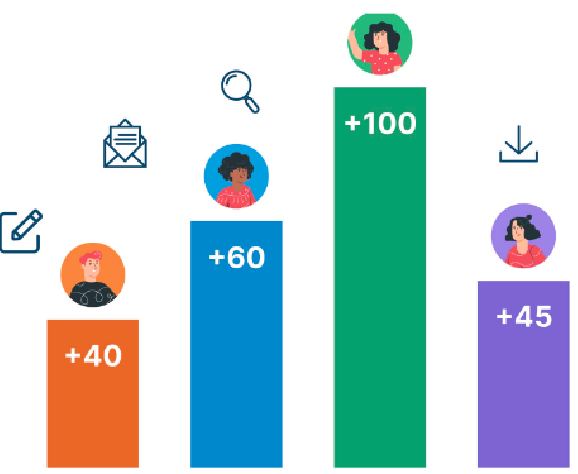

Credit: Salespane

### Business Need 

Businesses use **Lead Scoring** to rank and prioritize their leads based on their interest levels and potential for conversion into customers. It helps business teams to focus on the most promising leads and allocate their time and resources more efficiently.  

Each lead is ascribed a score based on,

* **demographic information**: job title, company size, etc.
* **user interaction** through multiple channels: website visits, email engagement, social media interactions

The actual criteria and their corresponding weights may vary according to the business and the target audience.

This leads to,

* Improvment in effectiveness of market campaigns
* Increase conversions to paid subscribers, hence, revenue
* Efficient marketing resource allocations and focus on high potential leads

### Need for automation

Firms advertise through multiple channels and need to correlate the respective expenditures with the revenue generated through each. Manual scoring of lead interest is **subjective, inconsistent**. As businesses scale, it also becomes **difficult**. A machine learning model can learn from historical data, identify high-potential leads and suggest better avenues to spend marketing budget.

### Automated approaches

Approaches depend on data availability/volume, system complexity, availability of computational resources, etc.

1. **Rule-based**: Score is assigned based on **pre-specified criteria and weightage**. It is **more consistent** than manual scoring but **lacks flexibility and adaptability**.  <br><br>


2. **Linear optimization**: Objective function is defined to increase conversion, reduce total cost, and accommodate** constraints. The obtained linear equation is solved using solver tools like Gurobi, Pulp, etc. <br><br>


3. **Machine Learning**: This **combines strengths of historical data and statistical methods**, and is **more flexible and adaptive**.  <br><br>


We treat this as a **supervised learning problem** with the target variable 'Lead Interest'.

We compare performances of 7 models: **Linear Regression, Naive Bayes, Support Vector Machines, Random Forest, Light Gradient Boosting, Extreme Gradient Boosting, and Neural Networks.**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/marketing-data/Marketing_Data.csv


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
path = "https://s3.amazonaws.com/projex.dezyre.com/how-to-build-a-lead-scoring-model-machine-learning-python/materials/Marketing_Data.csv"
df = pd.read_csv(path)
df.head()

,Lead Id,Lead Owner,Interest Level,Lead created,Lead Location(Auto),Creation Source,Next activity,What do you do currently ?,What are you looking for in Product ?,Website Source,Lead Last Update time,Marketing Source,Lead Location(Manual),Demo Date,Demo Status,Closure date
0,5e502dcf828b8975a78e89f3e9aeac12,e14c3a,Not Interested,12-01-2023 16:42,IN,API,NaN,Student,NaN,NaN,12-01-2023 19:27,NaN,India,NaN,NaN,NaN
1,efe3f074c61959c2ea1906dd0346aa69,d16267,Slightly Interested,04-12-2021 09:32,NaN,API,12-01-2022 00:00,NaN,NaN,Sales lead,12-01-2022 17:17,Paid - Instagram,India,05-12-2021 00:00,No Show,NaN
2,d26dc5cd5843622a203cf396b4ee4b1a,d138f9,No Answer,15-04-2022 10:16,NaN,API,16-04-2022 00:00,NaN,NaN,NaN,16-04-2022 20:35,Paid-Adwords,In,NaN,NaN,NaN
3,d50acaedc1e5b9c18f8ceb3c6cff345b,38e2a6,Not Interested,21-10-2022 17:02,IN,API,23-10-2022 00:00,fresher,NaN,NaN,02-12-2022 13:35,Paid-Adwords,IN,22-11-2022 00:00,Scheduled,NaN
4,07758f3d12a23e68bb3b58b8009dd9a8,d130bb,Not Interested,25-10-2021 10:48,NaN,API,NaN,NaN,NaN,Sales lead,13-11-2021 14:51,Affiliate,India,NaN,NaN,NaN


## EDA and Data Cleaning

In [4]:
df.shape

(38984, 16)

In [5]:
df.columns

Index(['Lead Id', 'Lead Owner', 'Interest Level', 'Lead created',
       'Lead Location(Auto)', 'Creation Source', 'Next activity',
       'What do you do currently ?', 'What are you looking for in Product ?',
       'Website Source', 'Lead Last Update time', 'Marketing Source',
       'Lead Location(Manual)', 'Demo Date', 'Demo Status', 'Closure date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Lead Id                                38984 non-null  object
 1   Lead Owner                             38984 non-null  object
 2   Interest Level                         38847 non-null  object
 3   Lead created                           38984 non-null  object
 4   Lead Location(Auto)                    10810 non-null  object
 5   Creation Source                        38984 non-null  object
 6   Next activity                          14776 non-null  object
 7   What do you do currently ?             16909 non-null  object
 8   What are you looking for in Product ?  9970 non-null   object
 9   Website Source                         24088 non-null  object
 10  Lead Last Update time                  38984 non-null  object
 11  Marketing Sourc

In [7]:
# Casting datetime columns in proper format

df['Lead created'] = pd.to_datetime(df['Lead created'], format="%d-%m-%Y %H:%M")
df['Lead Last Update time'] = pd.to_datetime(df['Lead Last Update time'], format="%d-%m-%Y %H:%M")
df['Next activity'] = pd.to_datetime(df['Next activity'], format="%d-%m-%Y %H:%M")
df['Demo Date'] = pd.to_datetime(df['Demo Date'], format="%d-%m-%Y %H:%M")

Text(0.5, 1.0, 'Lead Counts by Interest Level')

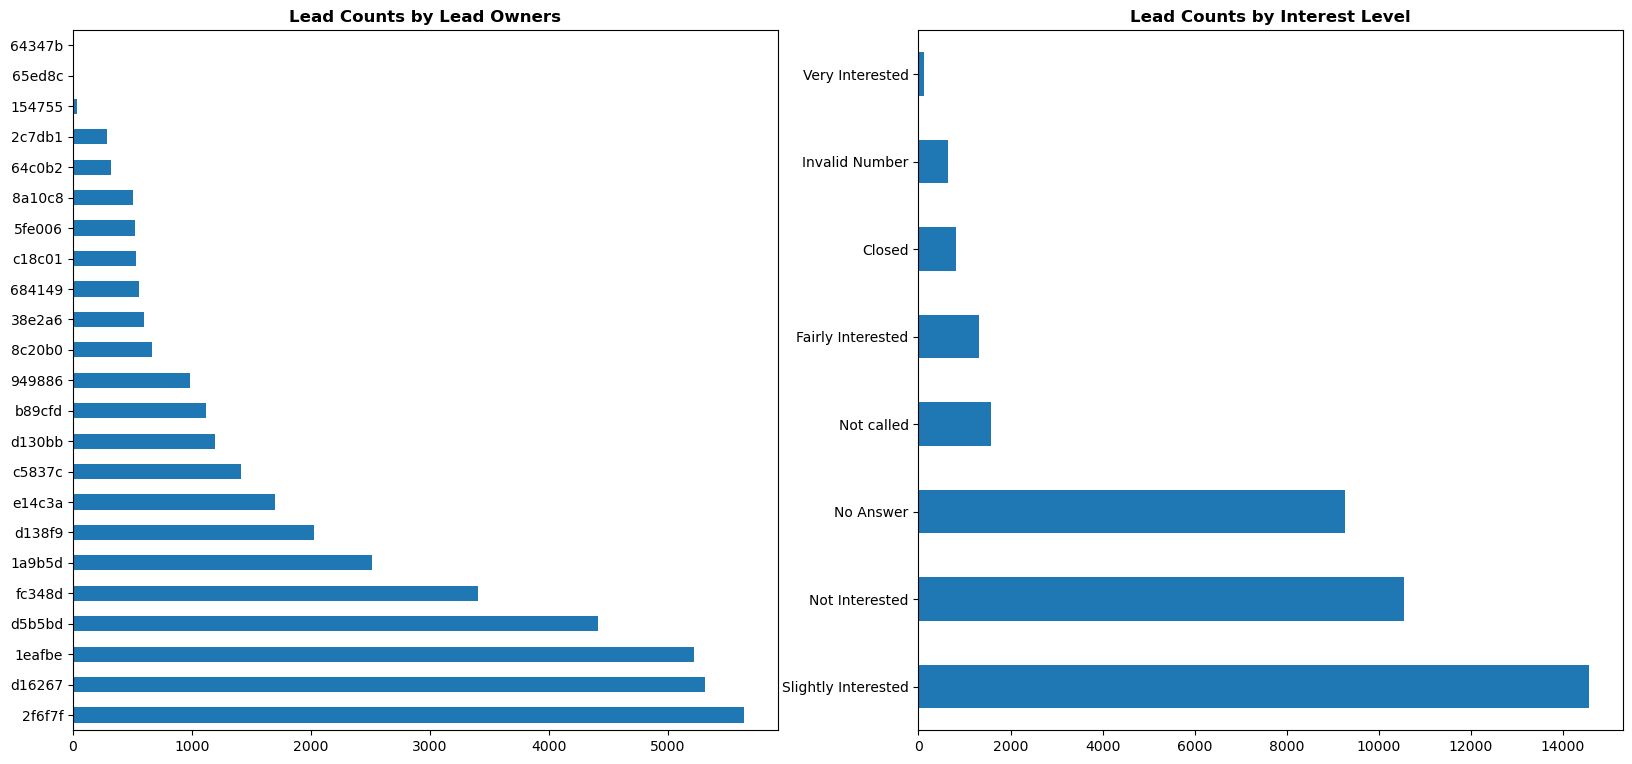

In [8]:
plt.figure(figsize=(20, 20))

plt.subplot(221)
df['Lead Owner'].value_counts().plot(kind='barh')
plt.title('Lead Counts by Lead Owners', weight='bold')

plt.subplot(222)
df['Interest Level'].value_counts().plot(kind='barh')
plt.title('Lead Counts by Interest Level', weight='bold')

Each category is fairly well represented in above plots. This is important for Interest Level as it is the target label and needs to have a balanced representation. Many of the interest levels are semantically similar and collapsed into a single category. We need to consider whether to treat this as a binary or multi-class classification problem. 

Text(0.5, 1.0, 'Lead Counts by Creation Source')

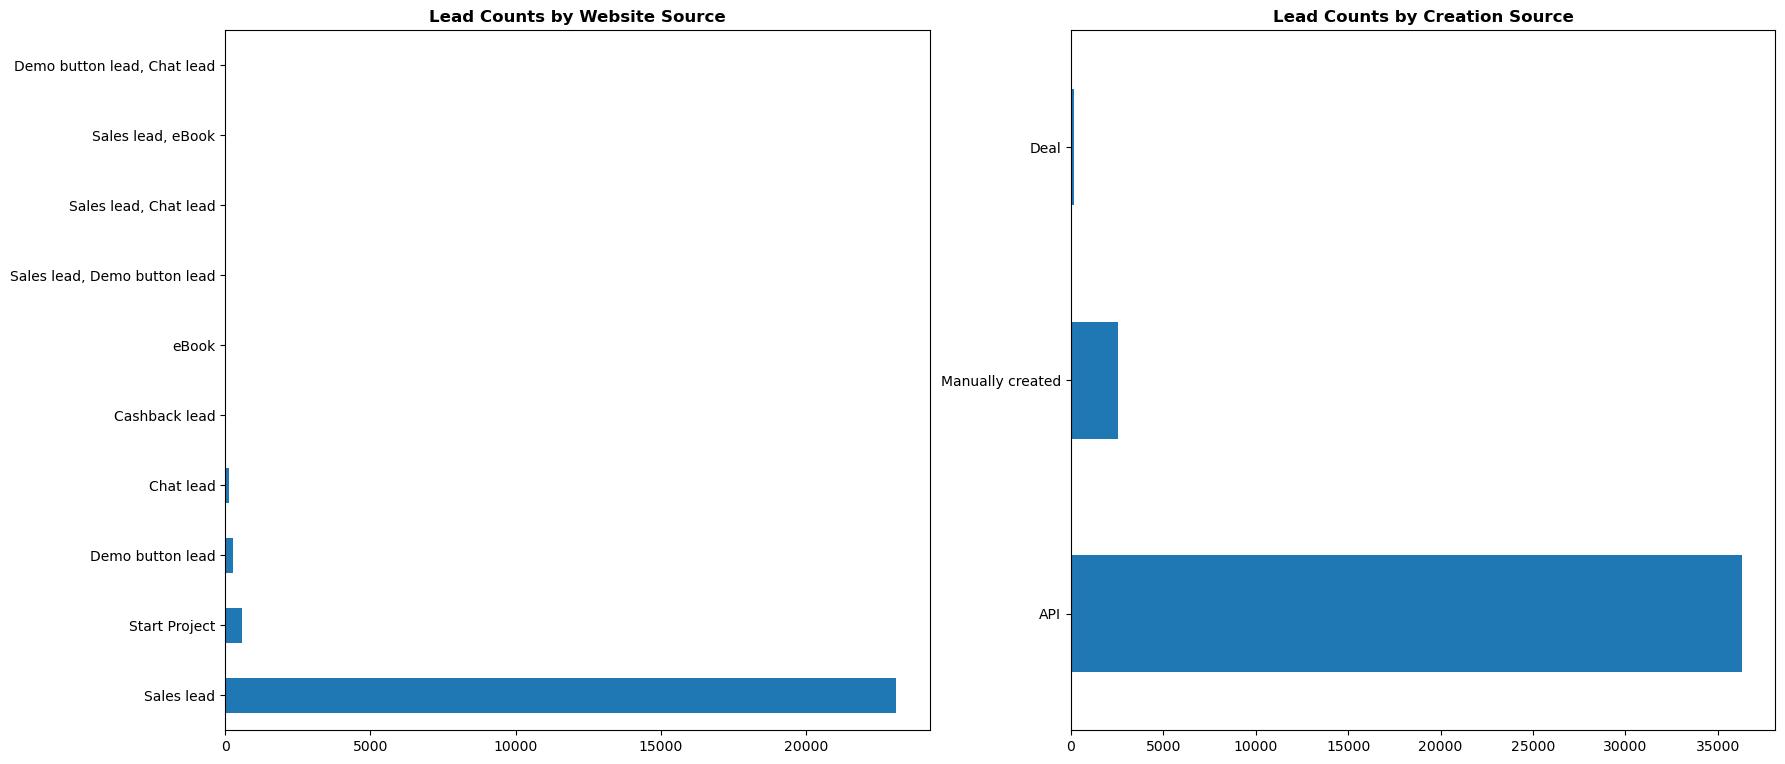

In [9]:
plt.figure(figsize=(20, 20))

plt.subplot(221)
df['Website Source'].value_counts().plot(kind='barh')
plt.title('Lead Counts by Website Source', weight='bold')

plt.subplot(222)
df['Creation Source'].value_counts().plot(kind='barh')
plt.title('Lead Counts by Creation Source', weight='bold')

Website sources have very little variation and hence do not contribute much information to model's learning. Creation sources have just 3 categories, which makes for an easier model. It is worth checking if this will cause feature leak.

Text(0.5, 1.0, 'Lead Counts by Demo Status')

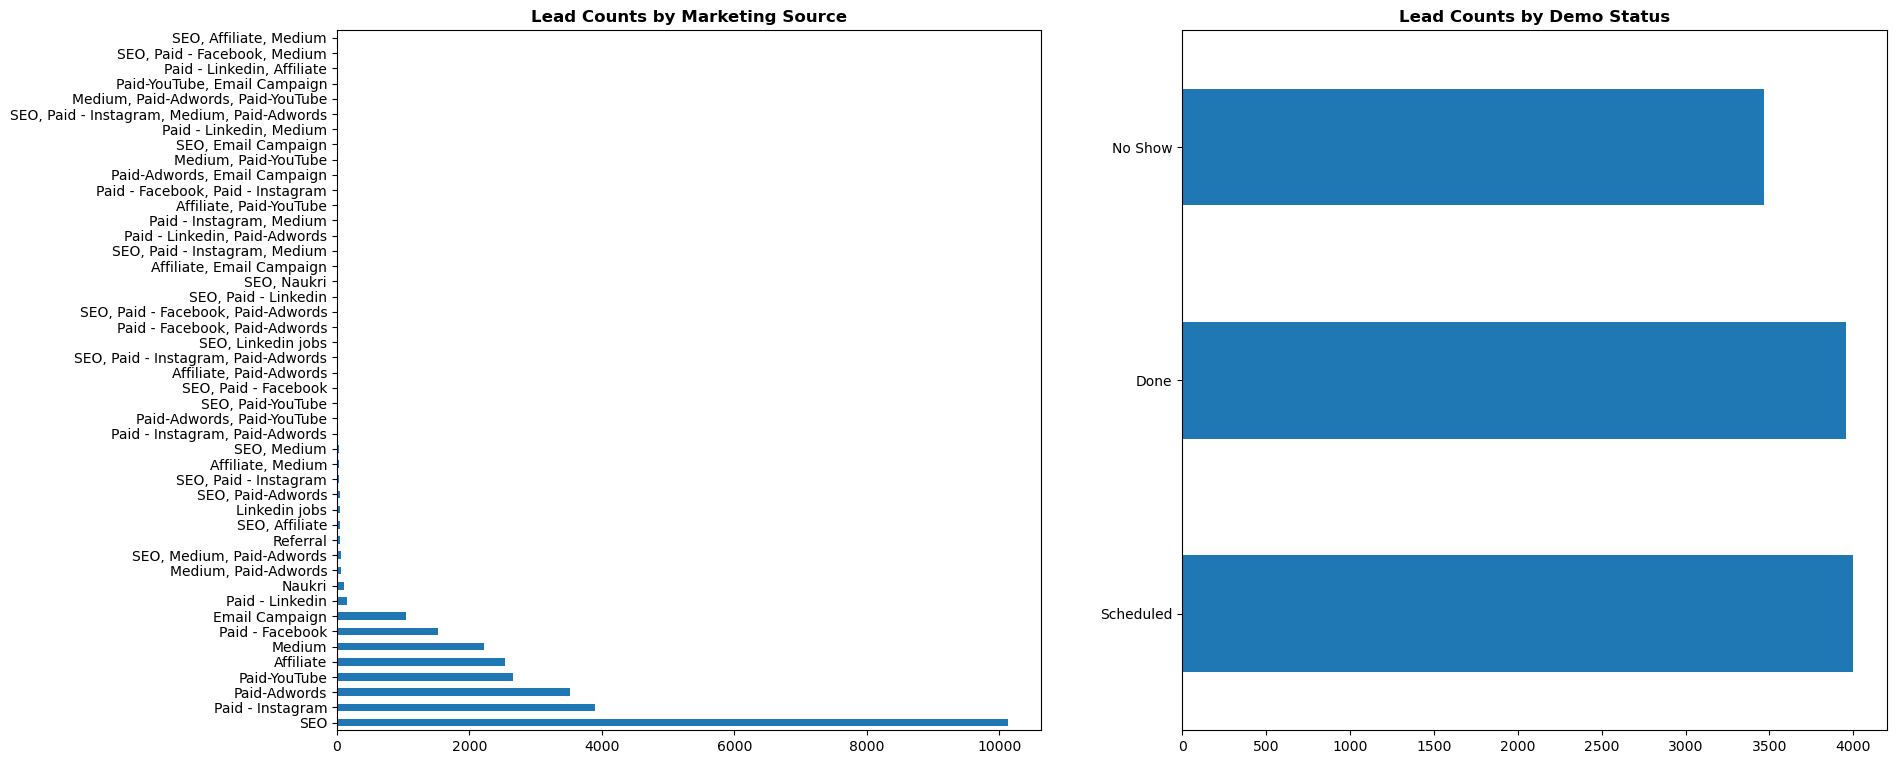

In [10]:
plt.figure(figsize=(20, 20))

plt.subplot(221)
df['Marketing Source'].value_counts().plot(kind='barh')
plt.title('Lead Counts by Marketing Source', weight='bold')

plt.subplot(222)
df['Demo Status'].value_counts().plot(kind='barh')
plt.title('Lead Counts by Demo Status', weight='bold')

Having too many values in marketing source, with a majority unrepresented, can unnecessarily confuse the model. The top few values can yield interesting comparisons.  

The distribution of 'demo status' is fairly equitable and it will be a challenge to capture the subtleties in contrasting.

In [11]:
df['Lead Location(Manual)'].value_counts()

IN                       14126
India                    11274
In                        2079
US                        1631
in                         634
                         ...  
Mumbai, India.               1
Hungary                      1
IN\                          1
ps                           1
Vishakhapatnam, India        1
Name: Lead Location(Manual), Length: 415, dtype: int64

Having too many unique values can affect training. Multiple lead location values can be collapsed into just two: 'India' and 'Outside India'

In [12]:
df['What do you do currently ?'].value_counts()

Student                           3406
student                           1282
Fresher                            298
Working                            194
Working pro                        148
                                  ... 
JFW                                  1
BTECH last year                      1
Asst Project                         1
He is working in Sales               1
Course AIMA - Business Analyst       1
Name: What do you do currently ?, Length: 6831, dtype: int64

Multiple categories above are again similar and can be collapsed into few.

In [13]:
df['What are you looking for in Product ?'].value_counts()

DS                                  481
ML                                  325
DS projects                         254
ML projects                         221
BD                                  158
                                   ... 
Better knowledge & hands exp          1
ds in shipping and logistics          1
Better Knowledge & Career Opts        1
Project for College project work      1
DL, ML                                1
Name: What are you looking for in Product ?, Length: 4046, dtype: int64

Multiple categories above are again similar and can be collapsed into few broad categories

In [14]:
(100*df.isnull().sum())/len(df)

Lead Id                                   0.000000
Lead Owner                                0.000000
Interest Level                            0.351426
Lead created                              0.000000
Lead Location(Auto)                      72.270675
Creation Source                           0.000000
Next activity                            62.097271
What do you do currently ?               56.625795
What are you looking for in Product ?    74.425405
Website Source                           38.210548
Lead Last Update time                     0.000000
Marketing Source                         27.306074
Lead Location(Manual)                    10.286271
Demo Date                                72.165504
Demo Status                              70.698235
Closure date                             98.386518
dtype: float64

Quite a few columns have significant null values which might affect prediction. We can consider dropping them at a later stage.

In [15]:
# Dropping null values from target label and collapsing multiple labels to just two

df = df[df['Interest Level'].notna()]

df = df[~df['Interest Level'].isin(["Not called", "Closed", "Invalid Number"])]
df['Interest Level'] = df['Interest Level'].apply(lambda x: 1 if x in ["Slightly Interested", "Fairly Interested", "Very Interested"] else 0)
df['Interest Level'].value_counts()

0    19799
1    16016
Name: Interest Level, dtype: int64

Any missing values in target variable are not acceptable and we can drop these.   

We can also collapse multiple target label categories into just two, and keep this a Binary Classification problem.

In [16]:
# Dropping irrelevant columns and columns with significant null values

df = df.drop(["Lead Id", "Lead Location(Auto)", "Next activity", "What are you looking for in Product ?",
              "Lead Last Update time", "Lead Location(Manual)", "Demo Date", "Demo Status", "Closure date"], axis=1)

In [17]:
# Replacing lead creation datetime column with two columns with the information of hour and day

df['hour_of_day'] = df['Lead created'].dt.hour
df['day_of_week'] = df['Lead created'].dt.weekday
df = df.drop(["Lead created"], axis=1)

In [18]:
# Adding an extra column with labels for 'Creation Source' and checking its correlation with target label

from pandas import factorize

labels, categories = factorize(df["Creation Source"])
df["labels"] = labels
abs(df["Interest Level"].corr(df["labels"]))

0.008490292073158531

We find a weak, positive correlation.

In [19]:
# Dropping the extra column after checking the correlation

df = df.drop(["labels"], axis=1)

In [20]:
df['What do you do currently ?'].isna().sum()

19419

In [21]:
df['What do you do currently ?'].value_counts(normalize=1)

Student                           0.205904
student                           0.076482
Fresher                           0.018053
Working                           0.011710
Data Engineer                     0.008295
                                    ...   
Completed mba in civil            0.000061
Into automation                   0.000061
Stu - Btech Final year            0.000061
Big Data Prof                     0.000061
Course AIMA - Business Analyst    0.000061
Name: What do you do currently ?, Length: 6592, dtype: float64

We can collapse the multiple categories in this field into just two categories: 1 for student, 0 for non-student (assumed as a working professional).

In [22]:
df['What do you do currently ?'] = df['What do you do currently ?'].apply(lambda x: 1 if 'student' in str(x).strip().lower() else 0)

In [23]:
df['Website Source'].isna().sum()

13828

In [24]:
df['Website Source'].value_counts()

Sales lead                      21133
Start Project                     517
Demo button lead                  240
Chat lead                          78
Cashback lead                       6
eBook                               5
Sales lead, Demo button lead        4
Sales lead, Chat lead               2
Sales lead, eBook                   2
Name: Website Source, dtype: int64

We can safely drop this imbalanced column with significant null values.

In [25]:
df = df.drop(["Website Source"], axis=1)

In [26]:
df['Marketing Source'].value_counts()

SEO                                            9751
Paid - Instagram                               3738
Paid-Adwords                                   3258
Paid-YouTube                                   2376
Affiliate                                      2215
Medium                                         2045
Paid - Facebook                                1436
Email Campaign                                  813
Paid - Linkedin                                 136
Naukri                                           99
Medium, Paid-Adwords                             63
SEO, Medium, Paid-Adwords                        51
Linkedin jobs                                    42
SEO, Paid-Adwords                                39
Referral                                         38
SEO, Affiliate                                   38
SEO, Paid - Instagram                            30
Affiliate, Medium                                27
Paid - Instagram, Paid-Adwords                   23
SEO, Medium 

We can fill significant null values in this column with a label 'unknown'.

In [27]:
df['Marketing Source'].fillna("Unknown", inplace=True)

In [28]:
# Performing label encoding for three selective columns with limited unique values

le1, le2, le3 = preprocessing.LabelEncoder(), preprocessing.LabelEncoder(), preprocessing.LabelEncoder()

df['Marketing Source']= le1.fit_transform(df['Marketing Source'])
df['Lead Owner']= le2.fit_transform(df['Lead Owner'])
df['Creation Source']= le3.fit_transform(df['Creation Source'])

In [29]:
df.head()

,Lead Owner,Interest Level,Creation Source,What do you do currently ?,Marketing Source,hour_of_day,day_of_week
0,20,0,0,1,42,16,3
1,18,1,0,0,13,9,5
2,17,0,0,0,19,10,4
3,5,0,0,0,19,17,4
4,16,0,0,0,0,10,0


# Fitting, Predicting and Comparing Models

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [31]:
# Selecting only relevant feature columns and splitting train-test values

X = df[["Lead Owner", "What do you do currently ?", "Marketing Source", "Creation Source", "hour_of_day", "day_of_week"]]
y = df["Interest Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Instancing models with basic parameters

lr = LogisticRegression()
gnb = GaussianNB()
svm = LinearSVC()
rf = RandomForestClassifier(n_estimators=300)
xgb = XGBClassifier(n_estimators=300, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3)
lgb = LGBMClassifier(n_estimators=300)
nn =  MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10), random_state=123)

# Fitting models on the training set

lr.fit(X_train, y_train)
gnb.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)
nn.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10), random_state=123,
              solver='lbfgs')

In [33]:
def get_evaluation_metrics(model_name, model, pred, actual):
    print("Accuracy of %s: " % model_name, accuracy_score(pred, actual))

In [34]:
# Predicting target label with each model

y_lr_pred = lr.predict(X_test)
y_gnb_pred = gnb.predict(X_test)
y_svm_pred = svm.predict(X_test)
y_rf_pred = rf.predict(X_test)
y_xgb_pred = xgb.predict(X_test)
y_lgb_pred = lgb.predict(X_test)
y_nn_pred = nn.predict(X_test)

In [35]:
# Getting accuracy scores for each model

get_evaluation_metrics("Logistic Regression", lr, y_lr_pred, y_test)
get_evaluation_metrics("Gaussian Naive Bayes", gnb, y_gnb_pred, y_test)
get_evaluation_metrics("Linear SVM", svm, y_svm_pred, y_test)
get_evaluation_metrics("Random Forest", rf, y_rf_pred, y_test)
get_evaluation_metrics("XGBoost", xgb, y_xgb_pred, y_test)
get_evaluation_metrics("Light GBM", lgb, y_lgb_pred, y_test)
get_evaluation_metrics("Neural Network", nn, y_nn_pred, y_test)

Accuracy of Logistic Regression:  0.6040765042579924
Accuracy of Gaussian Naive Bayes:  0.6056121736702499
Accuracy of Linear SVM:  0.5705709898087393
Accuracy of Random Forest:  0.6953790311322072
Accuracy of XGBoost:  0.7320954907161804
Accuracy of Light GBM:  0.7300013960631021
Accuracy of Neural Network:  0.6381404439480665


XGBoost performs best, followed by Light GBM. SVM performs the worst. The results from Logistic Regression, Gaussian Naive Bayes, and Multi-layer Perceptron models is comparable, but not excellent.

In [36]:
precision_recall_curve(y_lr_pred, y_test), roc_curve(y_lr_pred, y_test)

((array([0.26022616, 0.3420026 , 1.        ]),
  array([1.        , 0.56437768, 0.        ]),
  array([0, 1])),
 (array([0.        , 0.38195886, 1.        ]),
  array([0.        , 0.56437768, 1.        ]),
  array([2, 1, 0])))

In [37]:
precision_recall_curve(y_gnb_pred, y_test), roc_curve(y_gnb_pred, y_test)

((array([0.26036577, 0.34395319, 1.        ]),
  array([1.        , 0.56729223, 0.        ]),
  array([0, 1])),
 (array([0.        , 0.38089845, 1.        ]),
  array([0.        , 0.56729223, 1.        ]),
  array([2, 1, 0])))

In [38]:
precision_recall_curve(y_svm_pred, y_test), roc_curve(y_svm_pred, y_test)

((array([0., 0., 1.]), array([1., 1., 0.]), array([0, 1])),
 (array([0.        , 0.42942901, 1.        ]),
  array([nan, nan, nan]),
  array([2, 1, 0])))

In [39]:
precision_recall_curve(y_rf_pred, y_test), roc_curve(y_rf_pred, y_test)

((array([0.43082507, 0.64694408, 1.        ]),
  array([1.       , 0.6448477, 0.       ]),
  array([0, 1])),
 (array([0.        , 0.26637233, 1.        ]),
  array([0.       , 0.6448477, 1.       ]),
  array([2, 1, 0])))

In [40]:
precision_recall_curve(y_xgb_pred, y_test), roc_curve(y_xgb_pred, y_test)

((array([0.39438783, 0.64726918, 1.        ]),
  array([1.        , 0.70477876, 0.        ]),
  array([0, 1])),
 (array([0.        , 0.25011526, 1.        ]),
  array([0.        , 0.70477876, 1.        ]),
  array([2, 1, 0])))

In [41]:
precision_recall_curve(y_lgb_pred, y_test), roc_curve(y_lgb_pred, y_test)

((array([0.4048583 , 0.65702211, 1.        ]),
  array([1.        , 0.69689655, 0.        ]),
  array([0, 1])),
 (array([0.       , 0.2474783, 1.       ]),
  array([0.        , 0.69689655, 1.        ]),
  array([2, 1, 0])))

In [42]:
precision_recall_curve(y_nn_pred, y_test), roc_curve(y_nn_pred, y_test)

((array([0.40541672, 0.55071521, 1.        ]),
  array([1.        , 0.58333333, 0.        ]),
  array([0, 1])),
 (array([0.        , 0.32448932, 1.        ]),
  array([0.        , 0.58333333, 1.        ]),
  array([2, 1, 0])))